In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

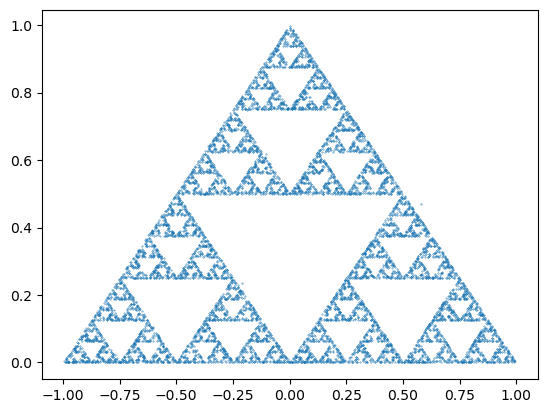

In [18]:
def sierpinski(N):
    v1 = np.array([-1,0])
    v2 = np.array([1,0])
    v3 = np.array([0,1])
    v = np.array([v1,v2,v3])
    vi = np.array([np.random.uniform(),np.random.uniform()])
    values = np.array([vi])
    for i in range(N):
        v_new = (v[np.random.randint(0,3)]+vi)/2
        values = np.concatenate((values,np.array([v_new])))
        vi = v_new
    plt.scatter(values[:,0],values[:,1],s=0.1)
    plt.savefig("sierpinski.png")
    plt.show()

sierpinski(10000)

In [43]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
 
def box_count(image):
    # finding all the non-zero pixels
    pixels=[]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>0:
                pixels.append((i,j))

    Lx=image.shape[1]
    Ly=image.shape[0]
    print (Lx, Ly)
    pixels=pl.array(pixels)
    print (pixels.shape)

    # computing the fractal dimension
    #considering only scales in a logarithmic list
    scales=np.logspace(0.01, 1, num=50, endpoint=False, base=2)
    Ns=[]
    # looping over several scales
    for scale in scales:
        #print ("======= Scale :",scale)
        # computing the histogram
        H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
        Ns.append(np.sum(H>0))

    coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)

    pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
    pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
    pl.xlabel('log $\epsilon$')
    pl.ylabel('log N')
    print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient

640 480
(305224, 2)
The Hausdorff dimension is 1.9904789934569183


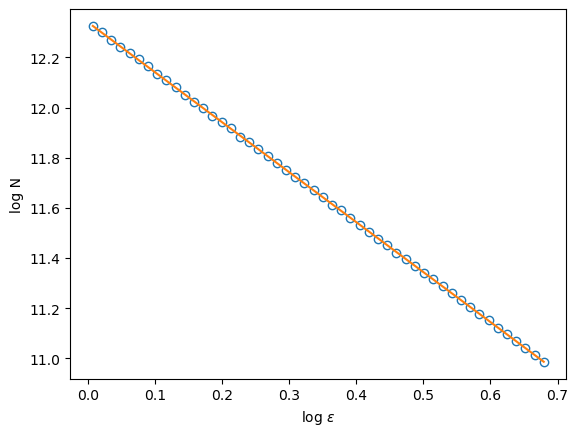

In [44]:
image1=rgb2gray(pl.imread("sierpinski.png"))
box_count(image1)

675 857
(562862, 2)
The Hausdorff dimension is 1.9672195662126883


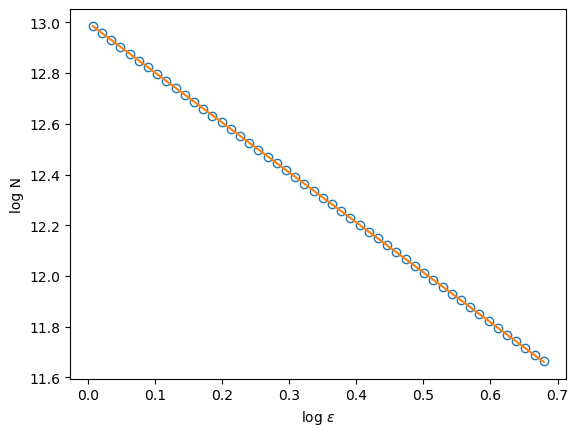

In [45]:
image2=rgb2gray(pl.imread("cpII_sheet05_ex02_coastline.png"))
box_count(image2)

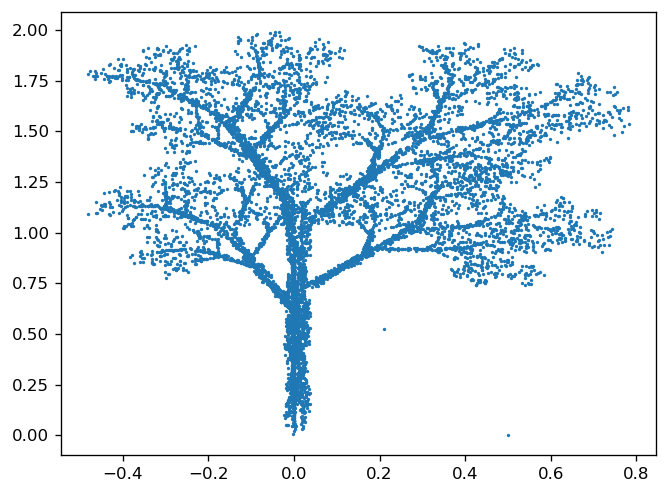

In [89]:
def self_sim(x,y,N=10000):
    xs = np.array([x])
    ys = np.array([y])
    for i in range(N):
        r = np.random.uniform()
        if 0 <= r < 0.1:
            x_new = 0.05*x
            y_new = 0.6*y
        elif 0.1 <= r < 0.2:
            x_new = 0.05*x
            y_new = -0.5*y + 1
        elif 0.2 <= r < 0.4:
            x_new = 0.46*x - 0.15*y
            y_new = 0.39*x + 0.38*y + 0.6
        elif 0.4 <= r < 0.6:
            x_new = 0.47*x - 0.15*y
            y_new = 0.17*x + 0.42*y + 1.1
        elif 0.6 <= r < 0.8:
            x_new = 0.43*x + 0.28*y
            y_new = -0.25*x + 0.45*y + 1
        elif 0.8 <= r < 1:
            x_new = 0.42*x + 0.26*y
            y_new = -0.35*x + 0.31*y + 0.7
        xs = np.append(xs,x_new)
        ys = np.append(ys,y_new)
        x = x_new
        y = y_new
    plt.figure(dpi=120)
    plt.scatter(xs,ys,s=1)
    plt.show()
    
self_sim(0.5,0)